<a href="https://colab.research.google.com/github/Megha2004/Data-Science/blob/main/Used_car_mpg_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv("/content/Car-mpg- Dataset (1).csv")
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [3]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

In [4]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_type',
       'car_name'],
      dtype='object')

In [5]:
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
car_name     object
dtype: object

<ipython-input-12-459ba46a6f27>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


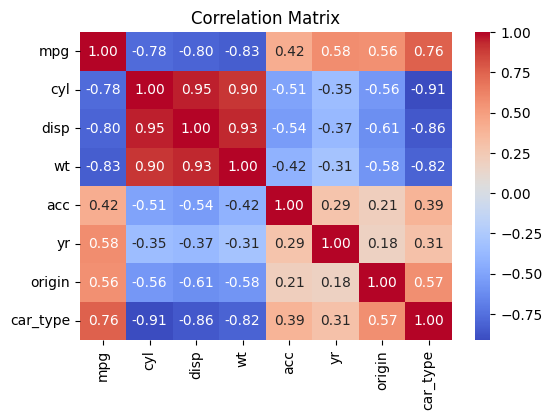

In [12]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

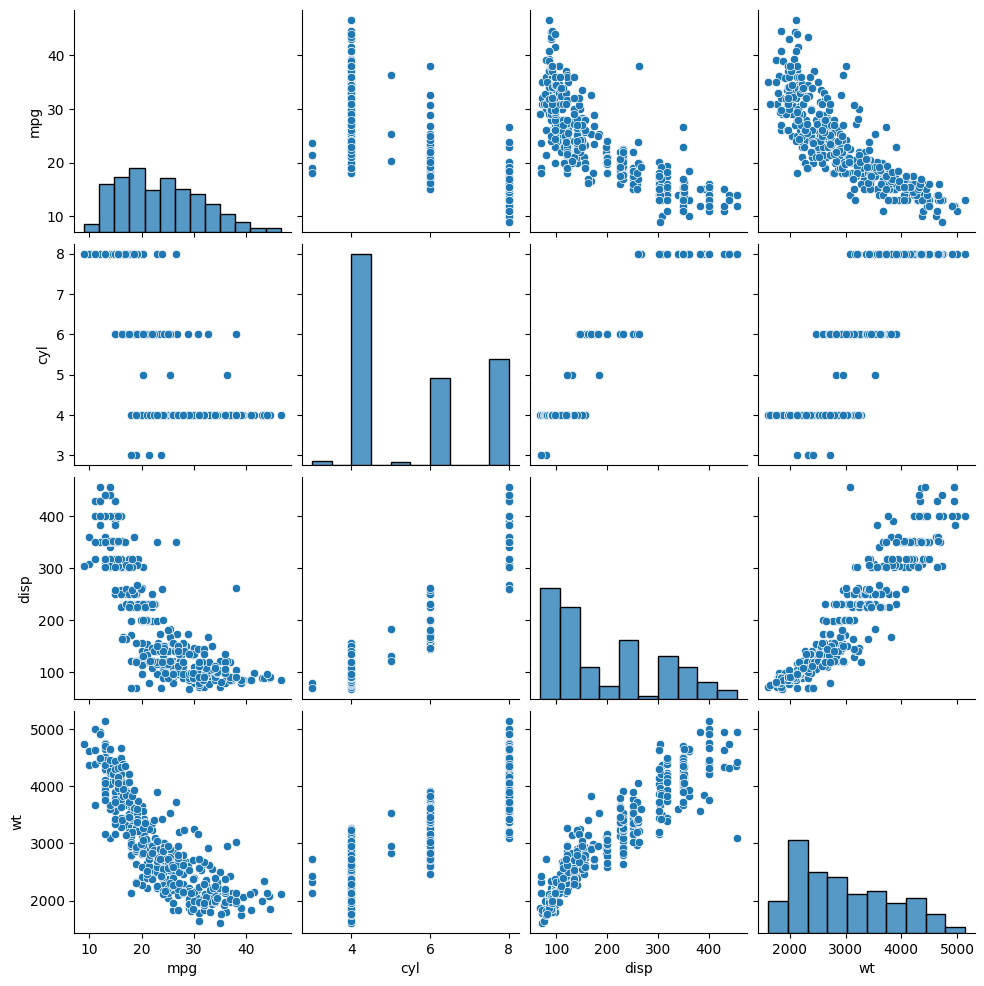

In [8]:
# Pairplot for selected features
sns.pairplot(df[['mpg', 'cyl', 'disp', 'hp', 'wt']])
plt.show()


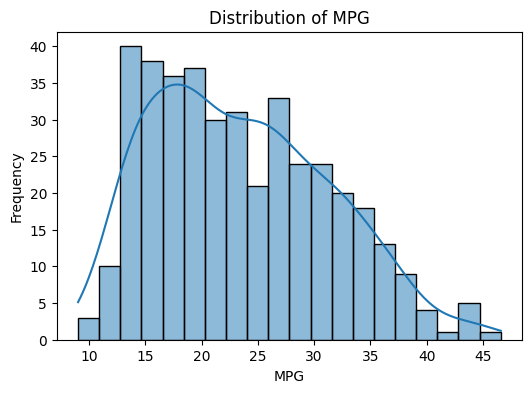

In [13]:
# Histogram of mpg
plt.figure(figsize=(6,4))
sns.histplot(df['mpg'], bins=20, kde=True)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

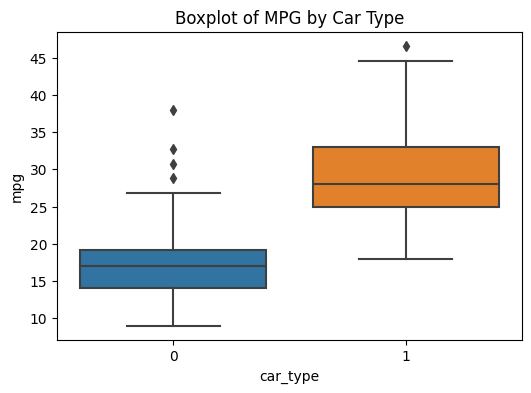

In [14]:
# Boxplot of mpg by car type
plt.figure(figsize=(6,4))
sns.boxplot(x='car_type', y='mpg', data=df)
plt.title('Boxplot of MPG by Car Type')
plt.show()

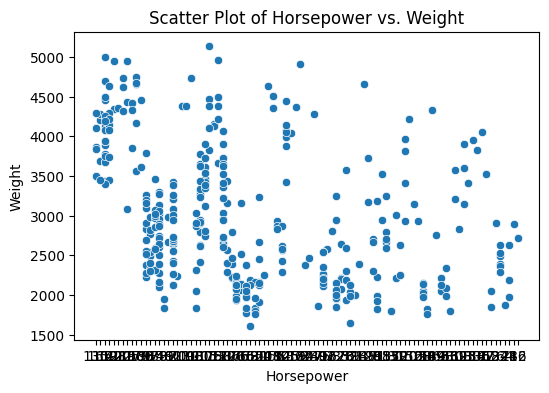

In [15]:
# Scatter plot of horsepower vs. weight
plt.figure(figsize=(6,4))
sns.scatterplot(x='hp', y='wt', data=df)
plt.title('Scatter Plot of Horsepower vs. Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.show()

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# Replace or handle missing values in 'hp' column
median_hp = df['hp'][df['hp'] != '?'].astype(float).median()
df['hp'] = df['hp'].replace('?', median_hp).astype(float)

# Convert 'hp' column to numeric
df['hp'] = pd.to_numeric(df['hp'], errors='coerce')

# Assuming 'mpg' is the target variable and 'cyl', 'hp', 'acc' are the selected features
selected_features = ['cyl', 'hp', 'acc']
X = df[selected_features]
y = df['mpg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 21.881
Mean Absolute Error: 3.38


In [38]:
user_input = {}
for feature in selected_features:
    user_input[feature] = float(input(f'Enter {feature}: '))

# Convert user input to DataFrame
user_data = pd.DataFrame([user_input])

# Standardize user input
user_data_scaled = scaler.transform(user_data)

# Make prediction
predicted_mpg = model.predict(user_data_scaled)

print(f'Predicted MPG: {predicted_mpg[0]}')

Enter cyl: 18
Enter hp: 150
Enter acc: 16
Predicted MPG: 16.9
